# Practice Notebook for Data Visualization with Python Course work
## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

## Univariate Exploration of Data

### Bar Charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pokemon = pd.read_csv("pokemon.csv")

In [3]:
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


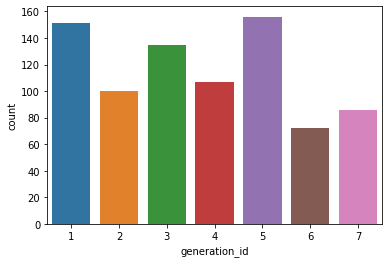

In [4]:
sns.countplot(data=pokemon, x='generation_id');

In [5]:
# obtaining color palette()
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [6]:
# getting the first color as our base color
base_color = sns.color_palette()[0]

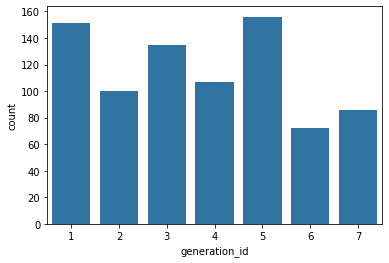

In [7]:
sns.countplot(data=pokemon, x='generation_id', color=base_color);

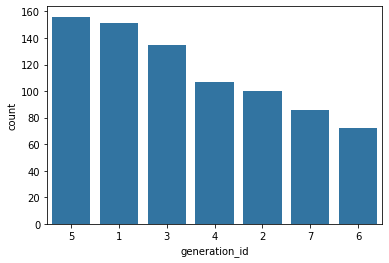

In [8]:
# sorting by number of pokemons introduced in each generation.
order_gen = pokemon.generation_id.value_counts().index
sns.countplot(data=pokemon, x='generation_id',
              color=base_color, order=order_gen);

* type_1 = offensive capabilites
* type_2 = defensive capabilities

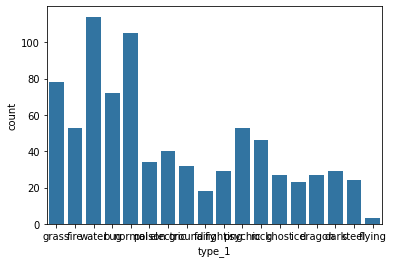

In [9]:
# let's look at the distribution of the offensive capabilities
sns.countplot(data=pokemon, x="type_1",
              color=base_color);

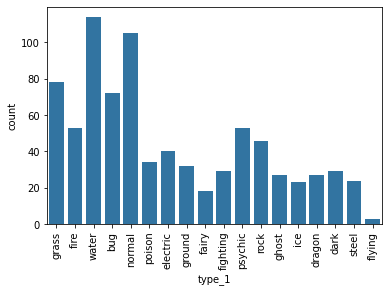

In [10]:
# rotating x ticks
sns.countplot(data=pokemon, x="type_1",
              color=base_color)
plt.xticks(rotation=90);

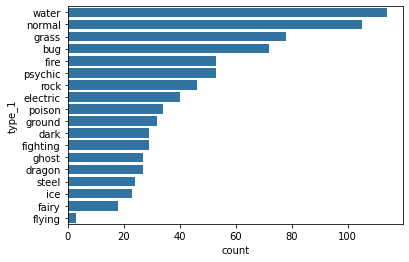

In [11]:
# creating a horizontal barchart instead
order_type1 = pokemon.type_1.value_counts().index
sns.countplot(data=pokemon, y="type_1",
              color=base_color, order=order_type1);

In [12]:
order_type1

Index(['water', 'normal', 'grass', 'bug', 'fire', 'psychic', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

#### Absolute vs. Relative Frequency

In [13]:
# let's reshape the pokemon dataframe
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1','type_2'],
                          var_name='type_level',
                          value_name='type')

pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [14]:
# count the frequency of unique values in the 'type' column of pkmn_types
# dataframe.
type_counts = pkmn_types.type.value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

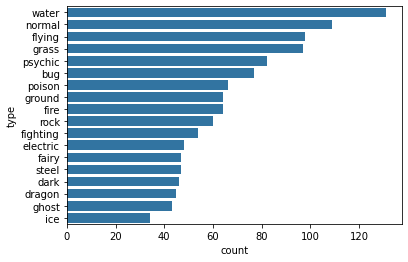

In [15]:
# plot the horizontal bar charts
sns.countplot(data=pkmn_types, y='type',
              order=type_counts.index, color=base_color);

Plot a bar chart having the proportions instead of the actual count on one of the axes.

In [16]:
# Returns the sum of all non-null values in `type` column
n_pokemon = pkmn_types.type.value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Compute the length of the longest bar in terms of the proportion
# This will be used as reference when creating uniform xticks
max_prop = max_type_count / n_pokemon
print('max_prop: ', max_prop)

# create a set of evenly spaced proportioned values between 0 and max_prop
# with a step size of 0.02
tick_props = np.arange(0, max_prop, 0.02)
print('tick_props: {}'.format(tick_props))

max_prop:  0.10808580858085809
tick_props: [0.   0.02 0.04 0.06 0.08 0.1 ]


In [17]:
# Use a list comprehension to create tick_names that we will apply to the
# tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a 
# formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` 
# is used to represent floating point number.

tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

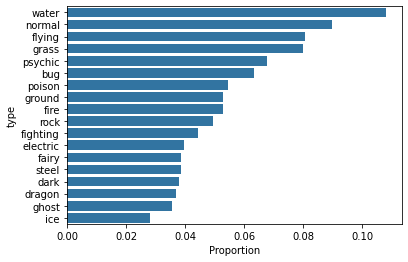

In [18]:
sns.countplot(data=pkmn_types, y='type',
              order=type_counts.index, color=base_color)
# change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('Proportion');

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

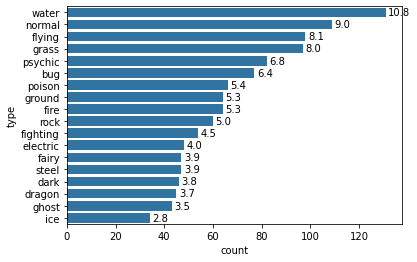

In [19]:
# Printing the text (proportion) on the bars
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, y='type',
              order=type_counts.index, color=base_color)

# logic to print the proportion text on the bars
for i in range(type_counts.shape[0]):
      # type_counts contains the freq of unique values in the `type` 
      # column in decreasing order
      count = type_counts[i]
      
      # convert count into a percentage, and then into string
      pct_string = '{:0.1f}'.format(100*count/n_pokemon)
      
      # print the string value on the bar
      # plt.text(x, y, s, fontdict=None, **kwargs)
      plt.text(count+1, i, pct_string, va='center')

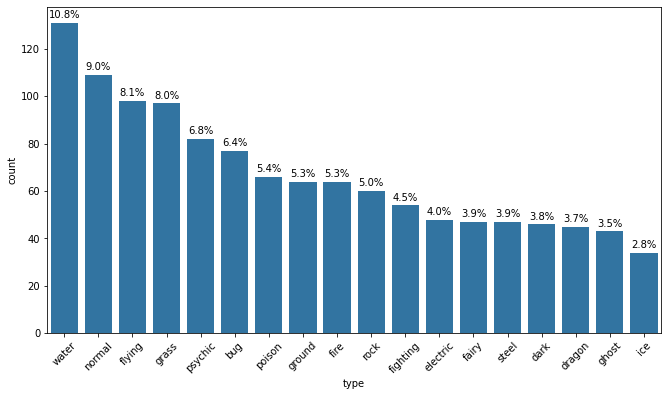

In [20]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sns.color_palette()[0]
plt.figure(figsize=(11,6))
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_counts.index);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

#### Bar Chart Practice

**TO DO Task 1**

* Explore the `pokemon` dataframe and try to understand the significance of each of its column.
* There have been quite a few Pokemon introduced over the series' history. Display the count of Pokemon introduced in each generation? Create a bar chart of these frequencies using the `generation_id` column.

In [21]:
pokemon

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79


In [22]:
pkmn_gen =  pokemon.generation_id.value_counts().sort_index()

In [23]:
pkmn_gen

1    151
2    100
3    135
4    107
5    156
6     72
7     86
Name: generation_id, dtype: int64

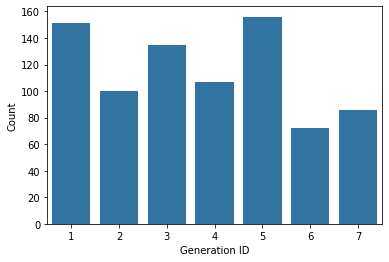

In [24]:
# getting the first color as our base color
base_color = sns.color_palette()[0]

sns.barplot(x=pkmn_gen.index, y=pkmn_gen.values,
            color=base_color)
plt.xlabel('Generation ID')
plt.ylabel('Count');

Since it's a count problem, let's use `sns.countplot()` instead.

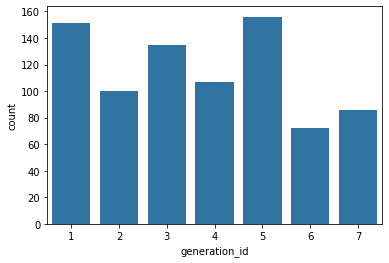

In [25]:
sns.countplot(data=pokemon, x='generation_id',
              color=base_color);

Shorter and more efficient abi?

**TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

***Display, how frequent is each type?***

The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [26]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [27]:
order_type = pkmn_types.type.value_counts()

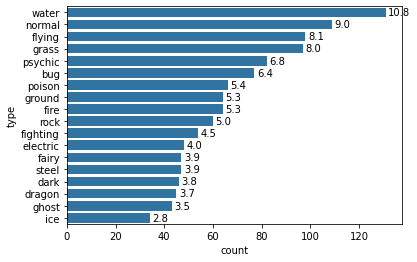

In [28]:
sns.countplot(data=pkmn_types, y='type',
              order=order_type.index,
              color=base_color);

## adding the relative freq to top of bar
# number of pokemons
n_pokemon = order_type.sum()

# iterate x times, where x is the number of unique types
for i in range(order_type.shape[0]):
      # taking the first count value
      count = order_type[i]
      
      # convert count into pct proportion and then into string
      pct_string = '{:0.1f}'.format(100*count/n_pokemon)
      
      # print the string value on the bar
      plt.text(count+1, i, pct_string, va='center')


In [29]:
order_type

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

### Histograms

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

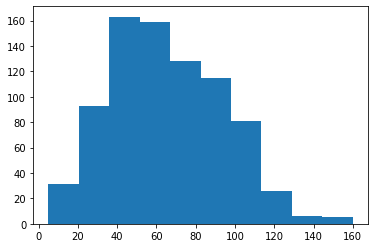

In [30]:
plt.hist(data=pokemon, x='speed')

By default, the `hist` function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings.

Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret.

You can use descriptive statistics (e.g. via **`dataframe['column'].describe()`**) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's `arange` function:

In [31]:
pokemon.speed.describe()


count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

Using a fixed number of bins

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <BarContainer object of 20 artists>)

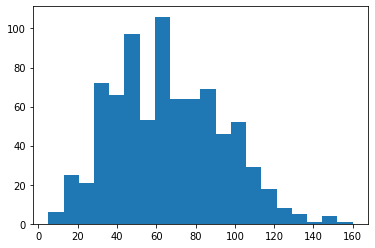

In [32]:
# using a fixed number of bins
plt.hist(data=pokemon, x='speed', bins=20)

Using a dynamic number of bins

In [33]:
# using a dynamic number of bins
## create bins with step-size 5
np.arange(0, pokemon.speed.max(), 5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155])

Notice that it didn't add the last value as normal Python `range` would. We need to add 5 to the end.

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <BarContainer object of 32 artists>)

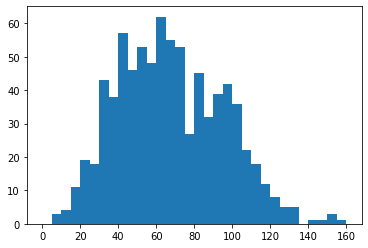

In [34]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=bins)
# note that not adding the semicolon was intentional

Using Seaborn's histplot

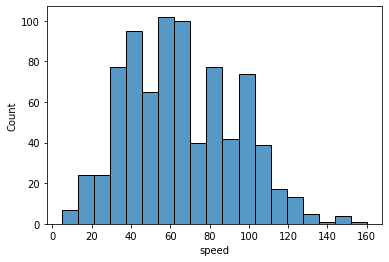

In [35]:
sns.histplot(pokemon['speed']);

Plot two histograms side-by-side

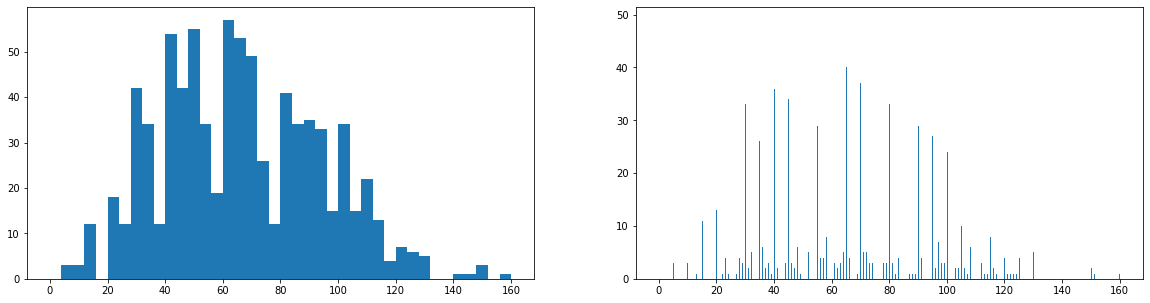

In [36]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

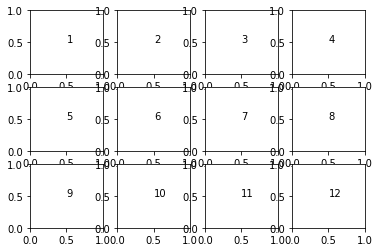

In [37]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

### Scales and Transformations
Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. 

#### Example 1 - Scale the x-axis to log-type

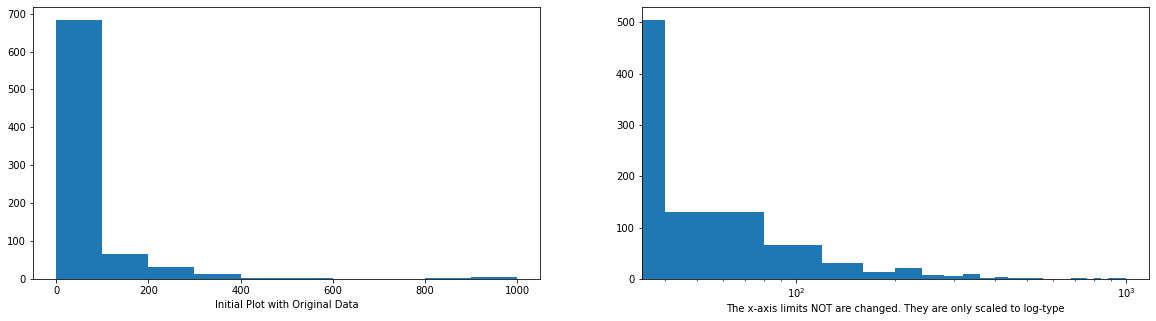

In [38]:
plt.figure(figsize=[20,5])

# histogram on left: full data without scaling
plt.subplot(1,2,1)
plt.hist(data=pokemon, x='weight')
plt.xlabel('Initial Plot with Original Data')

## don't spending too much time understanding this one.
## it's the next plot that matters
# histogram on right
plt.subplot(1,2,2)
bins  = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins)

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type');

Notice two things about the right histogram of example 1 above, now.

1. Even though the data is on a log scale, the bins are still **linearly spaced**. This means that they change size from wide on the left to thin on the right, as the values increase multiplicative. Matplotlib's xscale function includes a few built-in transformations: we have used the 'log' scale here.
2. Secondly, the default label (x-axis ticks) settings are still somewhat **tricky to interpret** and are **sparse** as well.

To address the bin size issue, we just need to change them so that they are **evenly-spaced powers of 10**. Depending on what you are plotting, a different base power like 2 might be useful instead.

To address the second issue of interpretation of x-axis ticks, the **scale transformation** is the solution. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units.

#### Example 2 - Scale the x-axis to log-type, and change the axis limit

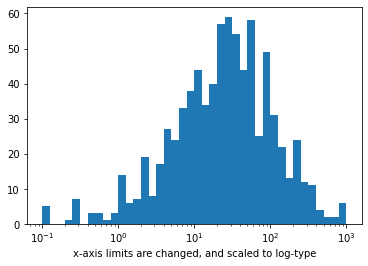

In [39]:
# axis transformation
# bin size
bins =  10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins)

plt.xscale('log') # apply an log scale

plt.xlabel('x-axis limits are changed, and scaled to log-type');

#### Example 3 - Scale the x-axis to log-type, change the axis limits, and increase the x-ticks

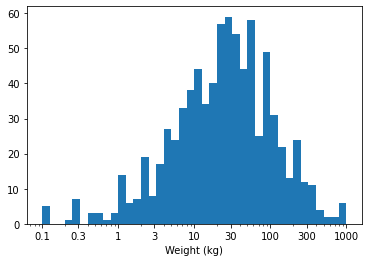

In [40]:
# get the ticks for bins between [0 - max weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# convert ticks into string values to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

# plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins)

plt.xscale('log')

# apply x-ticks
plt.xticks(ticks, labels)
plt.xlabel('Weight (kg)');

## Bivariate Exploration of Data
### Scatterplot (`quant`x`quant`)

#### Example 1 a. Scatter plot showing a negative correlation between two variables

In [41]:
fuel_econ = pd.read_csv("fuel-econ.csv")
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


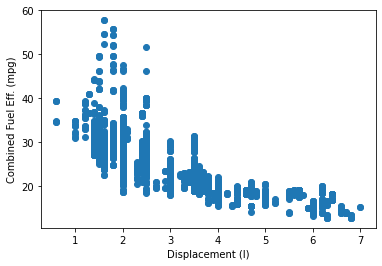

In [42]:
# scatterplot
plt.scatter(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Notice that the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

#### Example 1b. Scatter plot showing negative correlation between two variables using **`regplot()`**

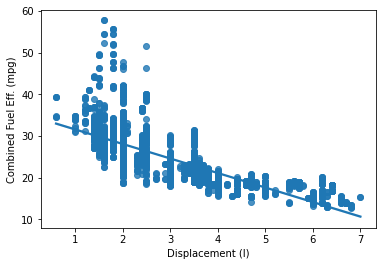

In [43]:
sns.regplot(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

The regression line in a scatter plot showing the negative correlation between the two variables.

#### Overplotting, Transparency, and Jitter
Jitter can be used to solve this issue in discrete quantitative data scatterplots.

<AxesSubplot:xlabel='year', ylabel='comb'>

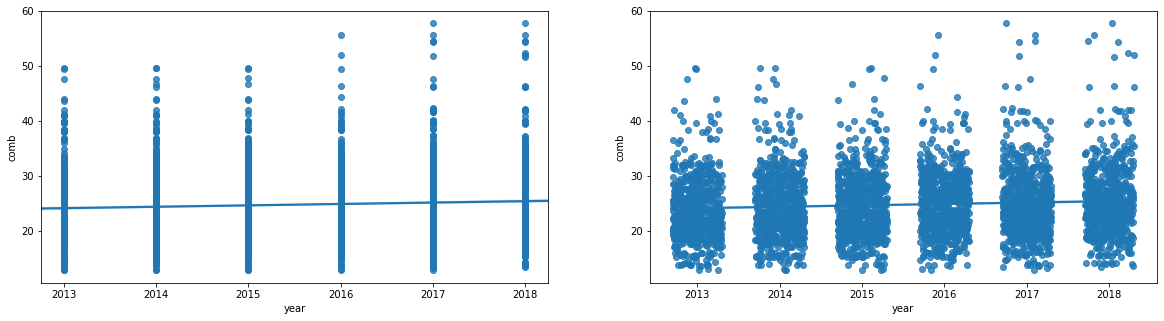

In [44]:
# resize figure to accommodate two plots
plt.figure(figsize=[20,5])

# plot on left - Simple scatter
plt.subplot(1,2,1)
sns.regplot(data=fuel_econ, x='year', y='comb',
            truncate=False)

# plot on right - 
# Scatter plot with Jitter
plt.subplot(1,2,2)
sns.regplot(data=fuel_econ, x='year', y='comb', x_jitter=0.3)

Plotting with both jitter and transparency

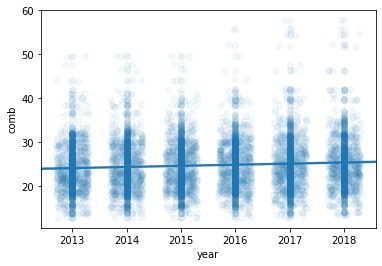

In [45]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', 
            truncate=False, x_jitter=0.3, 
            scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
# superimposing the original plot
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

### Heat maps

A scatter plot vs heat plot based on the same data


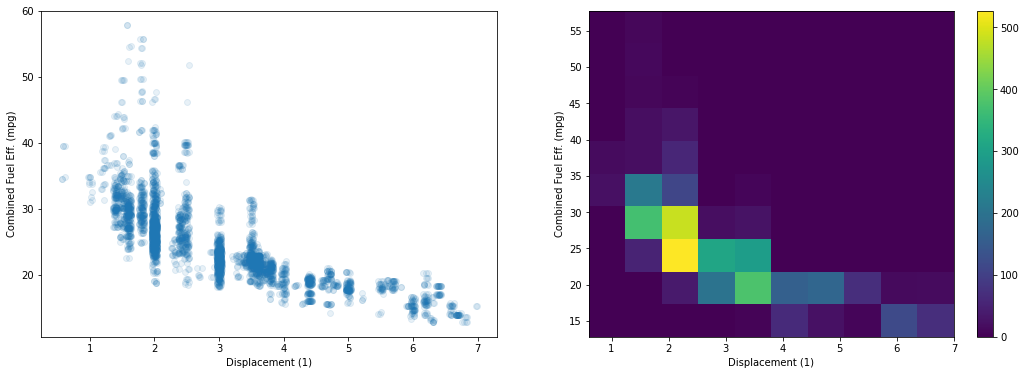

In [46]:
plt.figure(figsize=[18,6])
print('A scatter plot vs heat plot based on the same data')

# Plot on left
plt.subplot(1,2,1)
sns.regplot(data=fuel_econ, x='displ', y='comb',
            x_jitter=0.04, scatter_kws={'alpha':1/10},
            fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Plot on right
plt.subplot(1,2,2)
plt.hist2d(data=fuel_econ, x='displ', y='comb')
plt.colorbar() # adds the colorbar to the side
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

**Additional Variations**

To select a different color palette, you can set the "cmap" parameter in `hist2d`. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting `cmap = 'viridis_r'`.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a `cmin = 0.5` parameter to the `hist2d` call, this means that a cell will only get colored if it contains at least one point.

**Example 2. Heat plot - Set a minimum bound on counts and a reverse color map**

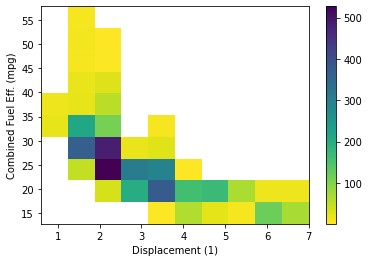

In [47]:
# use cmin to set a minimum bound of counts
# use cmap to reverse the color map.
plt.hist2d(data=fuel_econ, x='displ', y='comb',
           cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

As the count of points in the cell increases, the color in the heatmap gets brighter and moves from blue to yellow. But the bin size is to large.

**Example 3. Heat plot - Specify bin edges**

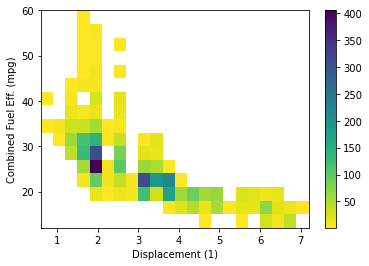

In [48]:
# specify bin edges
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb',
           cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Notice the area of high frequency in the middle of the negative trend in the plot.

Also notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram.

**Example 4. Add text annotation on each cell using `pyplot.text()` function**

In [49]:
fuel_econ.describe()[['displ','comb']]

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


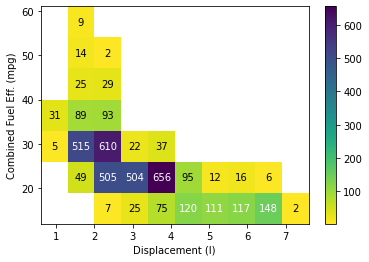

In [50]:
# specify bin edges
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)

# Use cmin to set a minimum bound of counts
# Use cmap to reverse the color map.
h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb',
                 cmin=0.5, cmap='viridis_r',
                 bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# select the bi-dimensional histogram, a 2D array of samples x and y.
# values in x are histogrammed along the first dimension and
# values in y are histogrammed along the second dimension.

counts = h2d[0] # this is a 22x16 matrix

# add text annotation on each cell
# loop through the cell counts and add text annotations for each
# loop through each row
for i in range(counts.shape[0]):
      # loop through each item in the array
      for j in range(counts.shape[1]):
            c = counts[i,j] # gets the value for that particular position
            
            # increase visibility on darker cells
            if c >=100:
                  plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                           ha='center', va='center', color='white')
            elif c>0:
                  plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                           ha='center', va='center', color='black')

**Note**: If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves.

You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's `heatmap()` function that is built for categorical heatmaps, as will be seen later.

#### Scatterplot Practice
**TODO 1**

Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a scatter plot to depict the data.
1. What is the general relationship between these variables?
2. Are there any points that appear unusual against these trends?

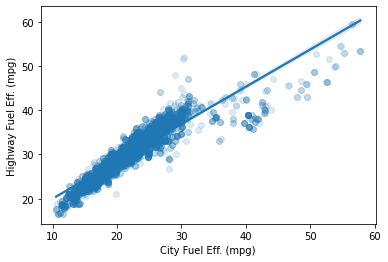

In [51]:
sns.regplot(data=fuel_econ, x='city', y='highway',
            scatter_kws={'alpha':0.15})
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

* Most of the data falls in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Some transparency is added vis 'alpha' to show the concentration of data.
* Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced. Infact, most carrs abouve 45 mpg city mpg have better city mpg than highway mpg, contrary to main trend.

**TO DO 2**

Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). **Use a heat map to depict the data.** How strong is this trend?

In [52]:
fuel_econ.describe()[['displ','co2']]

,displ,co2
count,3929.000000,3929.000000
mean,2.950573,376.564266
std,1.305901,92.338892
min,0.600000,29.000000
25%,2.000000,315.000000
50%,2.500000,369.000000
75%,3.600000,429.000000
max,7.000000,692.000000


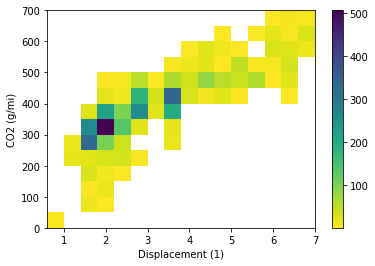

In [53]:
# specify bin edges
bins_x = np.arange(0.6, 7+0.4, 0.4)
bins_y = np.arange(0, 693+50, 50)

plt.hist2d(data=fuel_econ, x='displ', y='co2',
           cmin=0.5, cmap='viridis_r',
           bins=[bins_x,bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('CO2 (g/mi)');

### Violin Plot
#### Example 1. Violin plot for plotting a Quantitative variable (fuel efficiency) versus Qualitative variable (vehicle class)

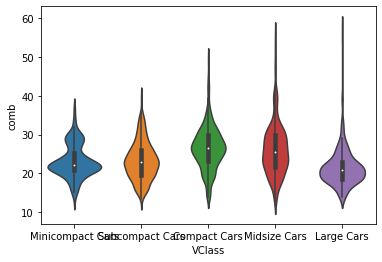

In [54]:
# types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# returns the types of sedan_classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# use pandas.astype() to convert the "VClass" column from a plain object type
# into an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

sns.violinplot(data=fuel_econ, x='VClass', y='comb');

#### Example 2. Violin plot without datapoints in the violin interior

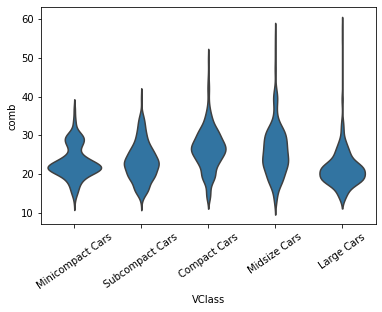

In [55]:
base_color = sns.color_palette()[0]

# the 'inner' argument represents the datapoints in the voilin interior.
# It can take any value from {"box", "quartile", "point", "stick", None}
# If "box", it draws a miniature boxplot.
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
               color=base_color, inner=None)
plt.xticks(rotation=35);

It can also be rendered horizontally.

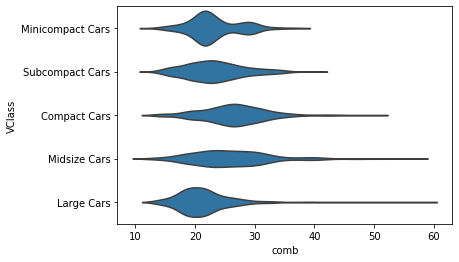

In [56]:
sns.violinplot(data=fuel_econ, y='VClass', x='comb',
               color=base_color, inner=None);

### Box Plots
#### Example 1. Violine versus Box plot

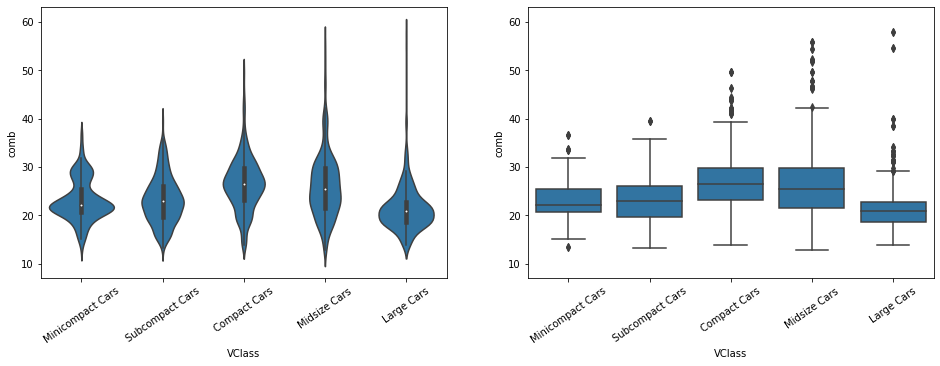

In [57]:
# two plots in one figure
plt.figure(figsize=[16,5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1,2,1)
# let's return the axes object so that we can use it's y-axis limits later
ax1 = sns.violinplot(data=fuel_econ, x='VClass', y='comb',
                     color=base_color)
plt.xticks(rotation=35)

# right plot: Box plot
plt.subplot(1,2,2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=35)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

#### Example 2. Horizontal box plot

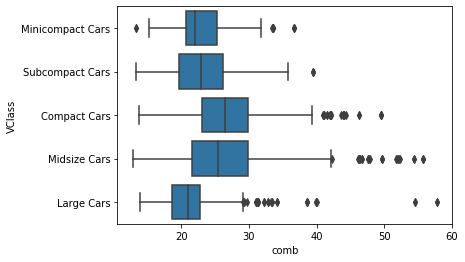

In [58]:
sns.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color);

#### Example 3. Violin plot with quartile information in the middle
In `violinplot`, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting `inner = 'quartile'`, three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

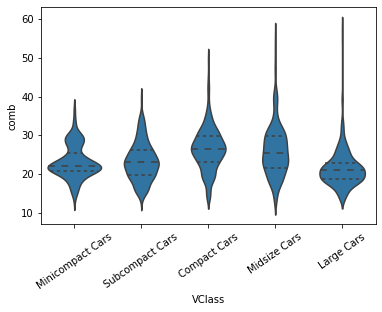

In [59]:
base_color = sns.color_palette()[0]

sns.violinplot(data=fuel_econ, x='VClass', y='comb',
               color=base_color, inner='quartile')
plt.xticks(rotation=35);

**TO DO**: 
1. What is the relationship between the size of a car and the size of its engine? The vehicle classes can be found in the `VClass` column, while the engine sizes are in the `displ` column (in liters). 

**Hint**: Make sure that the order of vehicle classes makes sense in your plot!

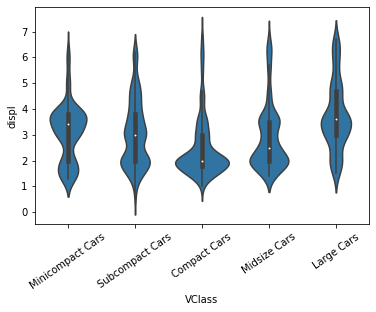

In [60]:
sns.violinplot(data=fuel_econ, x='VClass', y='displ',
               color=base_color)
plt.xticks(rotation=35);

One thing we can notice is that the relationship between the variables isn't consistent. Compact cars tend to have smaller engine sizes than mini-compact and subcompact cars, even though those two vehicle sizes are smaller. The box plot would make it easier to see that the median displacement for the two smallest vehicle classes is greater than the third quartile of the compact car class.

#### Example 1. Plot a bar chart between two qualitative variables
* convert the 'VClass' column from a plain object type into an ordered categorical type,
* add a new column for transmission type - [Automatic or Manual]

In [61]:
# the existing 'trans' column has multiple sub-types of automatic and manual
# but we need plain two types, automatic or manual. 

fuel_econ['trans_type'] = fuel_econ.trans.apply(lambda x:x.split()[0])
fuel_econ.trans_type.unique()

array(['Automatic', 'Manual'], dtype=object)

* Plot the bar chart

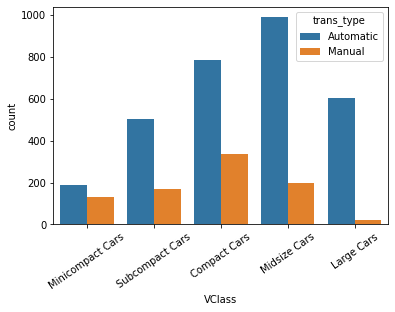

In [62]:
sns.countplot(data=fuel_econ, x='VClass', hue='trans_type')
plt.xticks(rotation=35);

#### Example 2. Plot a Heat Map between two qualitative variables.
Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

* Get the data into a desirable format

In [63]:
# Use group_by() and size() to get the number of cars and each combination of
# the two variable levels as a pandas series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()

In [64]:
# number of cars in each vehicle type and transmission combination.
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [65]:
# use series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [66]:
# use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type',
                            values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


* Plot the heatmap

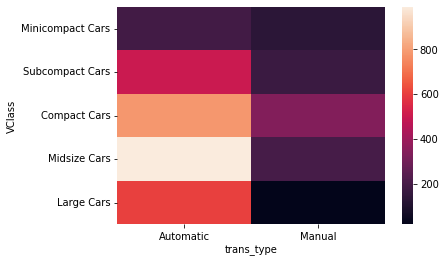

In [67]:
sns.heatmap(ct_counts);

#### Example 3. Additional variation with annotation.

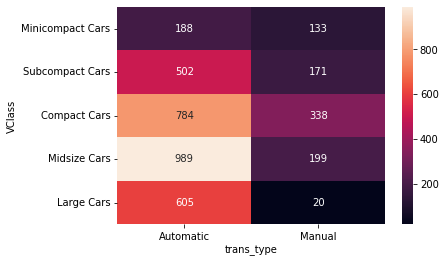

In [68]:
sns.heatmap(ct_counts, annot=True, fmt='d');

**TO DO**

Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the `fuelType` variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.)

**Note**: The dataset as provided does not retain any of the sorting of the `VClass` variable, so you will also need to copy over any code you used previously to sort the category levels.

In [69]:
cluster_bar_assgn = fuel_econ.query('fuelType in ["Premium Gasoline","Regular Gasoline"]')

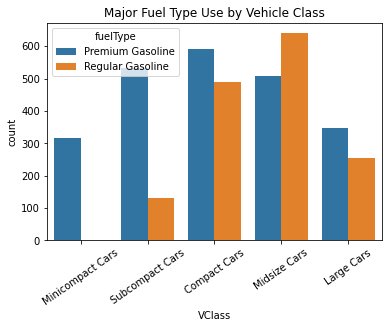

In [70]:
sns.countplot(data=cluster_bar_assgn, x='VClass', hue='fuelType')
plt.title('Major Fuel Type Use by Vehicle Class')
plt.xticks(rotation=35);

From this plot, you can see that more cars use premium gas over regular gas, and that the smaller cars are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.

### FacetGrid
Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. 
* First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example).
* Then we use the **`map`** method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

In the **`map`** call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like x = "comb", or the mapping won't work properly.

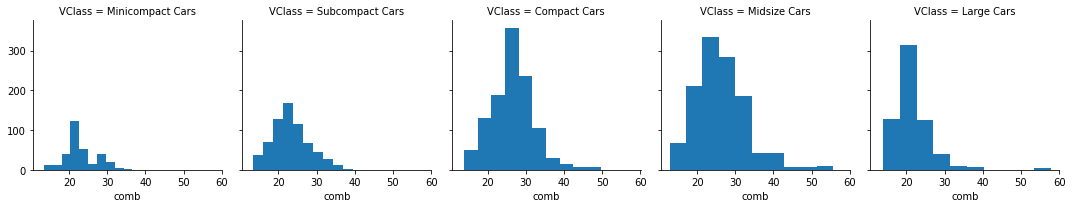

In [71]:
# plot the Seaborn's FacetGrid
g = sns.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, "comb");

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from hist to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups.
 
It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the map function.

#### Example 2.

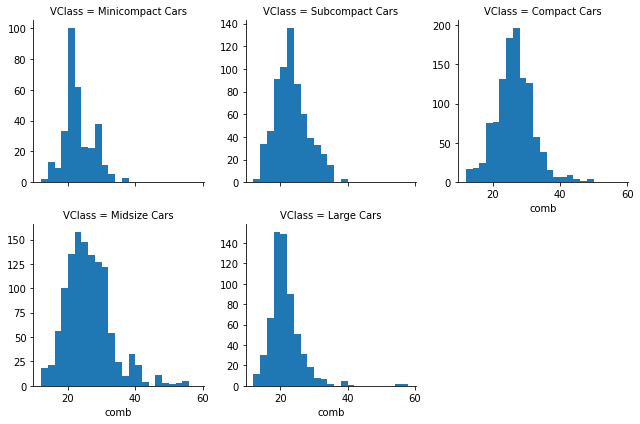

In [72]:
bin_edges = np.arange(12, 58+2, 2)

# try experimmenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sns.FacetGrid(data=fuel_econ, col='VClass',
                  col_wrap=3, sharey=False)
g.map(plt.hist, "comb", bins=bin_edges);

The example above has different y limits for each plot.

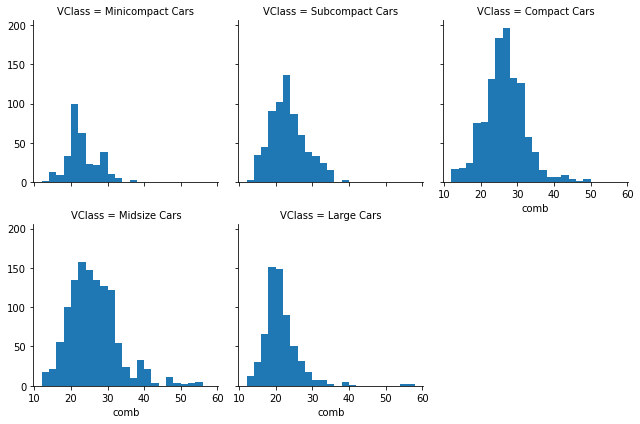

In [73]:
g = sns.FacetGrid(data=fuel_econ, col='VClass',
                  col_wrap=3)
g.map(plt.hist, "comb", bins=bin_edges);

#### Additional Variation
If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting `col_wrap = 7` means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.

Also, we want to have the facets for each transmission type in the decreasing order of combined fuel efficiency.

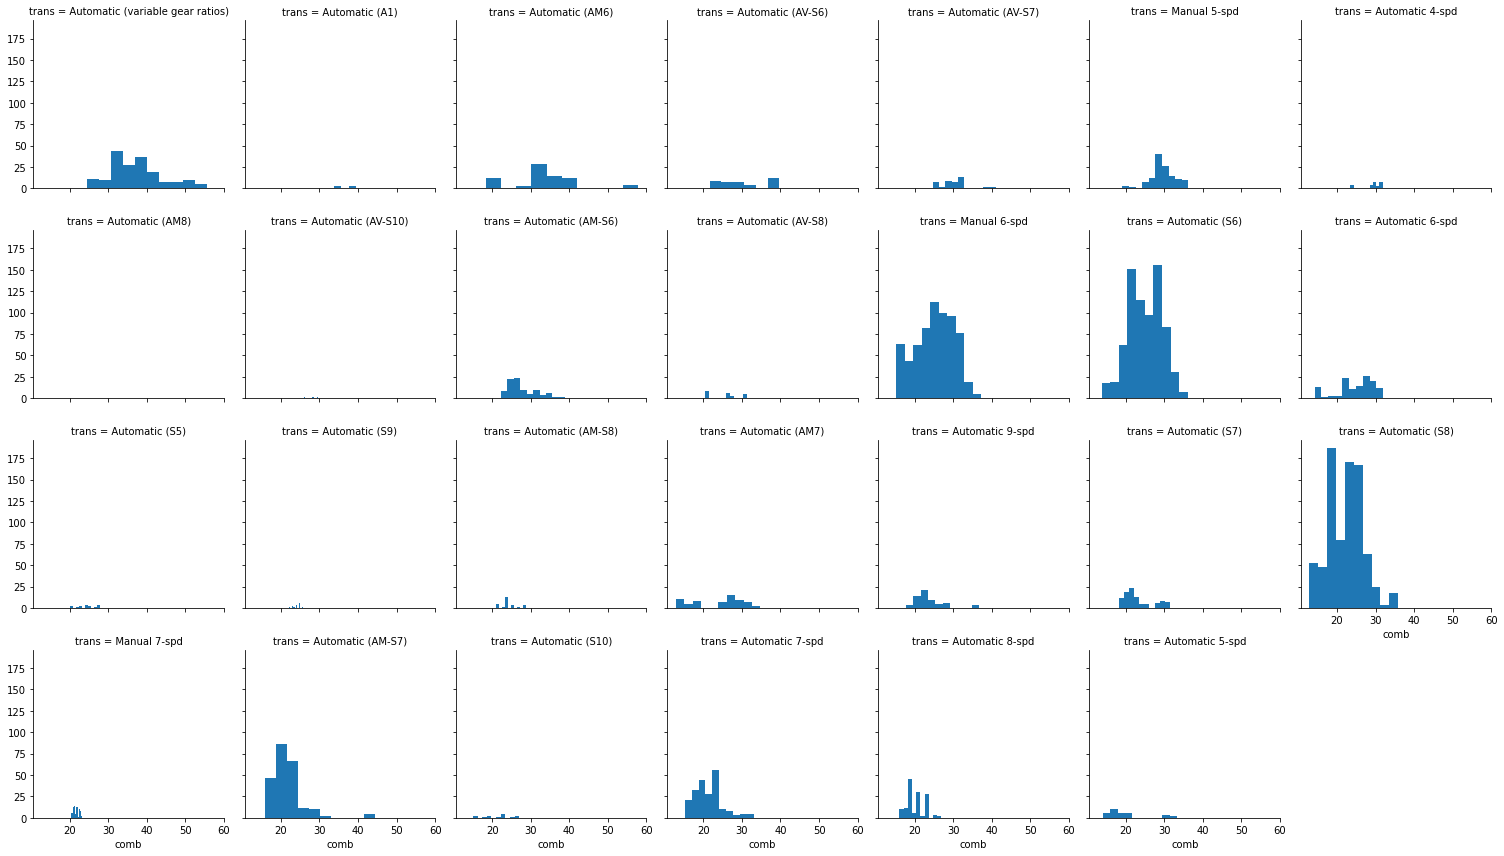

In [74]:
# find the order in which you want to display the facets
# for each transmission type, find the combined fuel efficiency

group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# select only the list of transmission type in the decreasing order of
# combined fuel efficiency
group_order = group_means.sort_values('comb', ascending=False).index

# use the argument col_order to display the FacetGrid in the desirable
# group_order
g = sns.FacetGrid(data=fuel_econ, col='trans', col_wrap=7,
                  col_order=group_order)
g.map(plt.hist, 'comb');


In [75]:
fuel_econ[['trans', 'comb']].groupby(['trans']).mean().sort_values('comb').index

Index(['Automatic 5-spd', 'Automatic 8-spd', 'Automatic 7-spd',
       'Automatic (S10)', 'Automatic (AM-S7)', 'Manual 7-spd',
       'Automatic (S8)', 'Automatic (S7)', 'Automatic 9-spd',
       'Automatic (AM7)', 'Automatic (AM-S8)', 'Automatic (S9)',
       'Automatic (S5)', 'Automatic 6-spd', 'Automatic (S6)', 'Manual 6-spd',
       'Automatic (AV-S8)', 'Automatic (AM-S6)', 'Automatic (AV-S10)',
       'Automatic (AM8)', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (AV-S7)', 'Automatic (AV-S6)', 'Automatic (AM6)',
       'Automatic (A1)', 'Automatic (variable gear ratios)'],
      dtype='object', name='trans')

### Adapted Bar Charts
These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's `barplot` function:

#### Example 1.

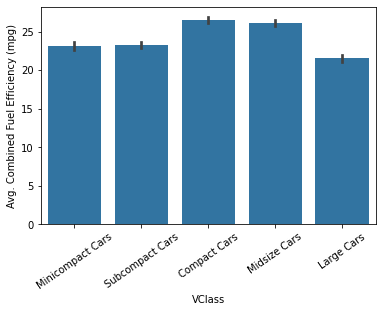

In [76]:
base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=35)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

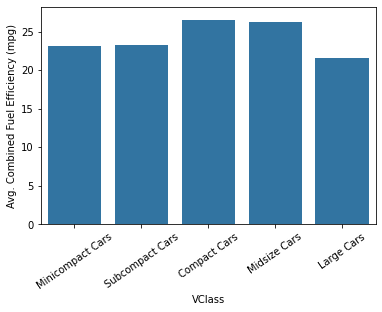

In [77]:
# barplot without error bars
sns.barplot(data=fuel_econ, x='VClass', y='comb',
            color=base_color, errwidth=0)
plt.xticks(rotation=35)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

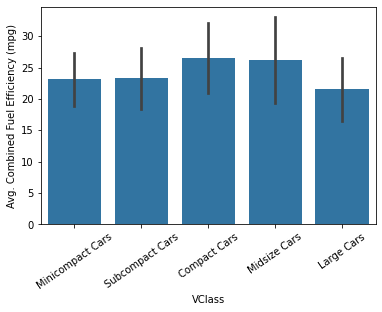

In [78]:
# bars represent standard deviation
sns.barplot(data=fuel_econ, x='VClass', y='comb',
            color=base_color, ci='sd')
plt.xticks(rotation=35)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

#### Point plot
As an alternative, the pointplot() function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

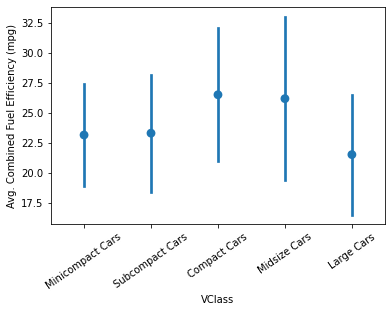

In [79]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb',
              color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=35)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. 

For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

#### Bringing a few charts together

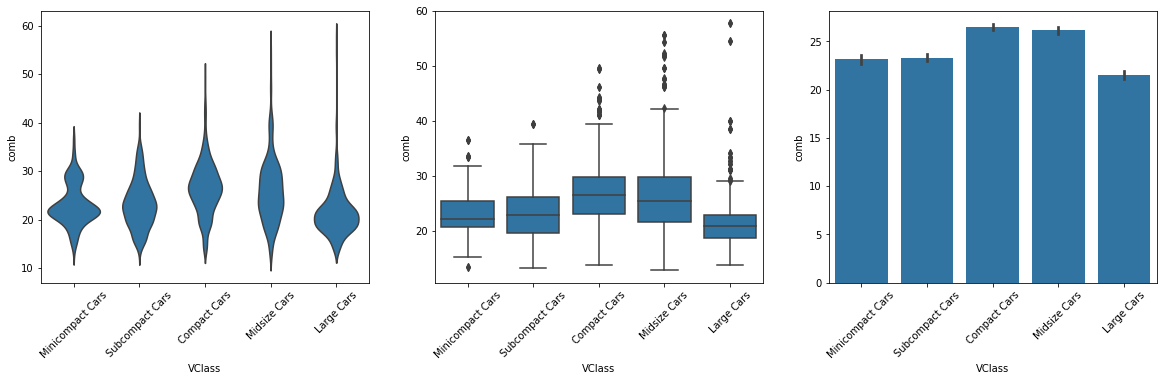

In [80]:
plt.figure(figsize=[20,5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1,3,1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
               inner=None, color=base_color)
plt.xticks(rotation=45)

# center plot: box plot
plt.subplot(1,3,2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb',
            color=base_color)
plt.xticks(rotation=45)

# right plot: adapted bar chart
plt.subplot(1,3,3)
sns.barplot(data=fuel_econ, x='VClass', y='comb',
            color=base_color)
plt.xticks(rotation=45);

### Line Plots
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against the values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

We will make use of Matplotlib's `errorbar()` function, performing some processing on the data in order to get it into its necessary form.

#### Example 1.

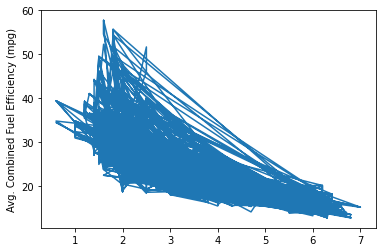

In [81]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. 

In order to create the line plot as intended, we need to do additional work to summarize the data.
#### Example 2.

In [82]:
# set a number of bins into which the data will be grouped.
# set bin edges and compute center of each bin
from xml.etree.ElementInclude import include


bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# cut the bin values into discrete intervals. Return a series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest=True)
displ_binned.head(15)

0     (3.6, 3.8]
1     (1.8, 2.0]
2     (3.4, 3.6]
3     (3.4, 3.6]
4     (2.2, 2.4]
5     (3.4, 3.6]
6     (3.4, 3.6]
7     (1.8, 2.0]
8     (1.8, 2.0]
9     (3.6, 3.8]
10    (3.6, 3.8]
11    (1.8, 2.0]
12    (3.6, 3.8]
13    (3.4, 3.6]
14    (3.6, 3.8]
Name: displ, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

A series object returned with the `fuel_ecom['displ']` column passed to the `pandas.cut()` function.

c:\Users\Cyriaque Matthews\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\Cyriaque Matthews\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


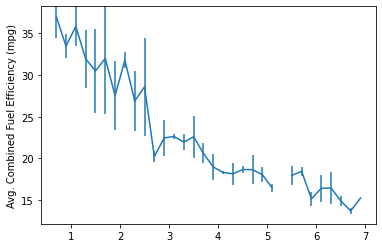

In [83]:
# for the points in each bin, we compute the mean and standard error of
# the mean.

comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');


Since the x-variable ('displ') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean.

**TO DO 1**

Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot.

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

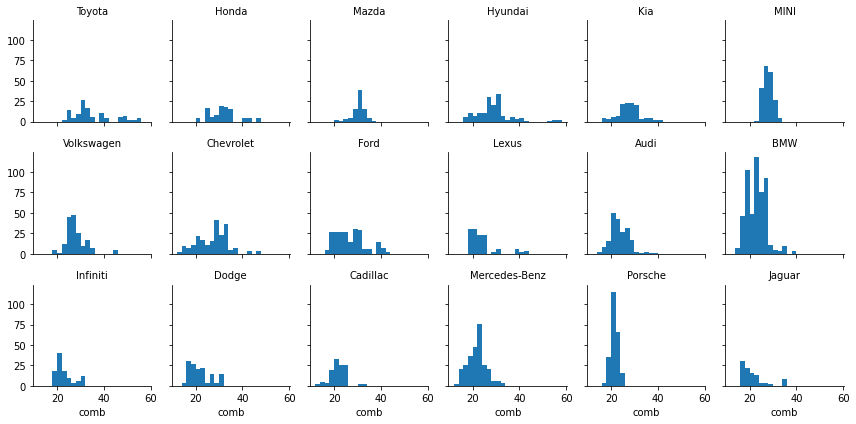

In [84]:
# creating subset
threshold = 80 # our threshold value
make_freq = fuel_econ['make'].value_counts()  # number of cars per make
idx = np.sum(make_freq > threshold)  # getting total no car manufactures with number of cars more than our threshold
most_makes = make_freq.index[:idx]   # subsetting to get the names of cars that are of interest
fuel_econ_sub = fuel_econ.query("make in @most_makes") # subsetting our main dataset to get our df of interest
make_means = fuel_econ_sub.groupby('make').mean() # mean values of each variable for each make
comb_order = make_means.sort_values('comb', ascending=False).index  # sorting by comb from highest to lowest and grabbing the index (name)

# plotting
g = sns.FacetGrid(data=fuel_econ_sub, col='make', col_wrap=6,
                  height=2, col_order=comb_order)
g.map(plt.hist, 'comb', bins=np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles("{col_name}");


One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.

**TO DO 2**

Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset

In [85]:
fuel_econ

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,...,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10,Automatic
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,...,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9,Automatic
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,...,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9,Automatic
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,...,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5,Automatic


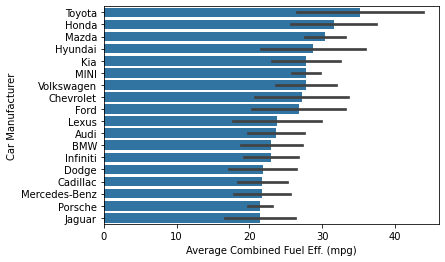

In [86]:
base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ_sub, x='comb', y='make',
            color=base_color, order=comb_order, ci='sd')
plt.ylabel('Car Manufacturer')
plt.xlabel('Average Combined Fuel Eff. (mpg)');

### Encoding in Color - Color Palettes

**Qualitative Palette**

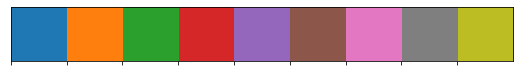

In [87]:
sns.palplot(sns.color_palette(n_colors=9))

**Sequential Palette**

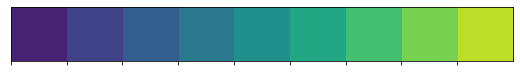

In [88]:
sns.palplot(sns.color_palette('viridis',9))

**Diverging Palette**

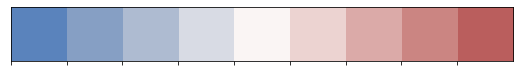

In [89]:
sns.palplot(sns.color_palette('vlag',9))

**TO DO 1** 

To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [91]:
pokemon.describe()

,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,404.000000,3.714994,1.162454,61.771128,144.848823,68.748451,76.086741,71.726146,65.830235,69.486989,70.013631
std,233.105126,1.944148,1.081030,111.519355,74.953116,26.032808,29.544598,29.730228,27.736838,29.439715,27.292344
min,1.000000,1.000000,0.100000,0.100000,36.000000,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000
25%,202.500000,2.000000,0.600000,9.000000,66.000000,50.000000,55.000000,50.000000,45.000000,45.000000,50.000000
50%,404.000000,4.000000,1.000000,27.000000,151.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000
75%,605.500000,5.000000,1.500000,63.000000,179.500000,80.000000,95.000000,89.000000,85.000000,90.000000,85.000000
max,807.000000,7.000000,14.500000,999.900000,608.000000,255.000000,181.000000,230.000000,160.000000,173.000000,230.000000


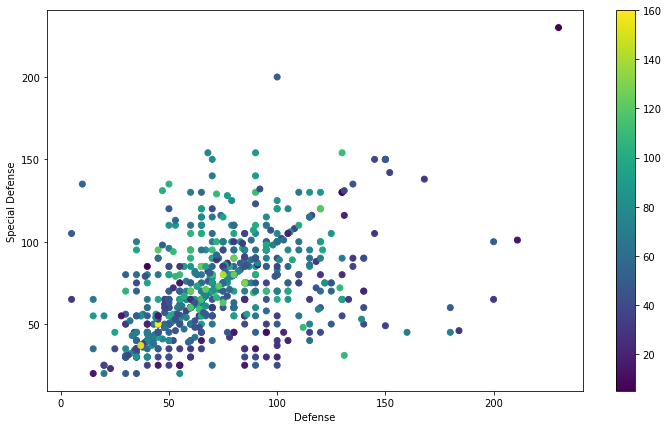

In [109]:
# scatterplot
plt.figure(figsize=(12,7))
plt.scatter(data=pokemon, x='defense', y='special-defense', 
            c='speed', cmap='viridis')
plt.colorbar()
plt.xlabel('Defense')
plt.ylabel('Special Defense');

I'll zoom in the next plot

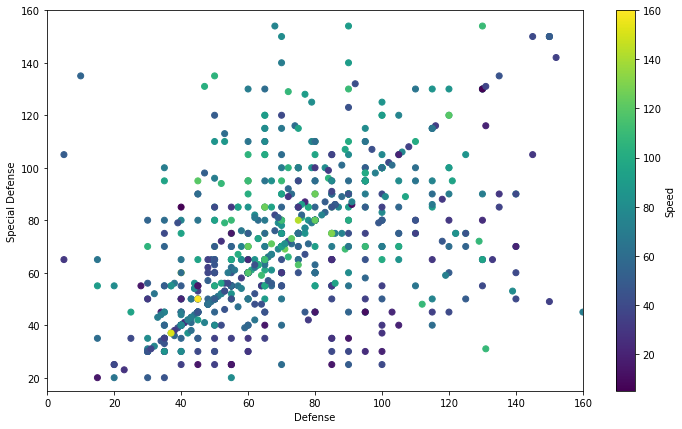

In [110]:
plt.figure(figsize=(12,7))
plt.scatter(data=pokemon, x='defense', y='special-defense', 
            c='speed', cmap='viridis')
plt.colorbar(label='Speed')
plt.xlim(0,160)
plt.ylim(15,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense');

From the plot, I can see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.

**Task 2**

How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks.


To complete this task, let's reshape the dataset so that all Pokemon types are recorded in a single column. This will add duplicates of Pokemon with the two types, which is fine for the task to be performed.

In [130]:
# columns that we want to melt.
type_cols = ['type_1', 'type_2']
# other columns. Ones not of interest
non_type_cols = pokemon.columns.difference(type_cols)
# melting the dataset
pkmn_types = pokemon.melt(id_vars=non_type_cols, value_vars=type_cols,
                          var_name='type_level', value_name='type').dropna()

In [131]:
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


In [135]:
pokemon_sub = pkmn_types.query("type in ['fairy', 'dragon']")

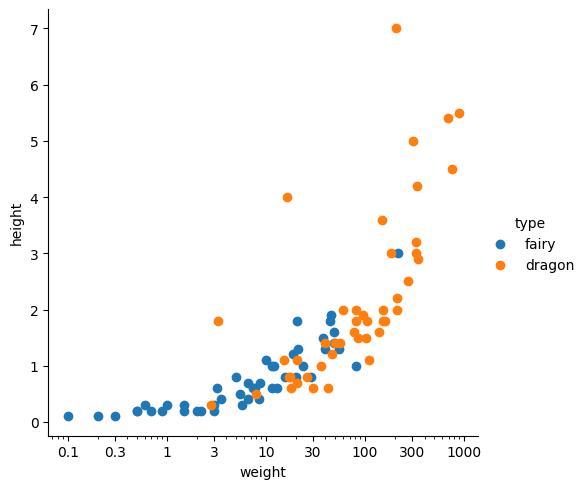

In [145]:
# plotting
g = sns.FacetGrid(data=pokemon_sub, hue='type', height=5)
g.map(plt.scatter, 'weight', 'height')
g.set(xscale = 'log')
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

`FacetGrid` is used to set up and generate the plot. `.set()` method for `FacetGrid` objects is used to set the x-scaling and tick marks. The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.

#### Faceting in Two Directions
Our original faceting of univariate data

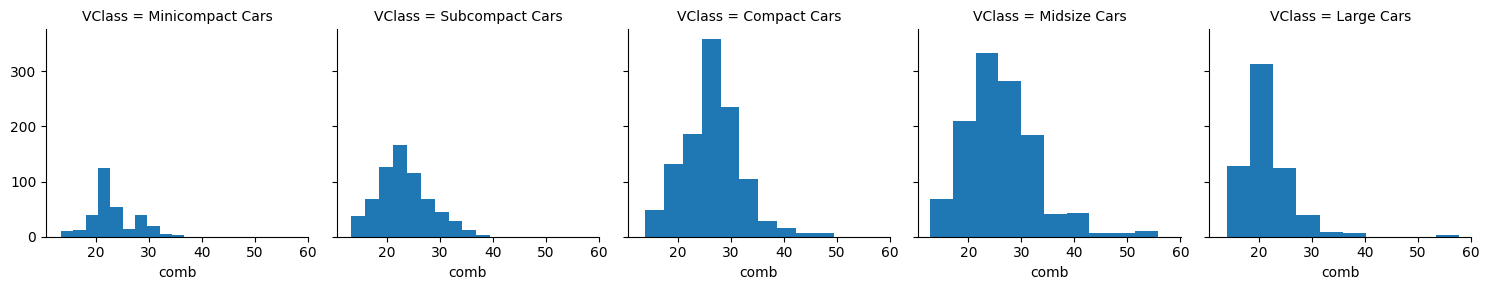

In [147]:
g = sns.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, "comb");

Now, faceting bivariate data.

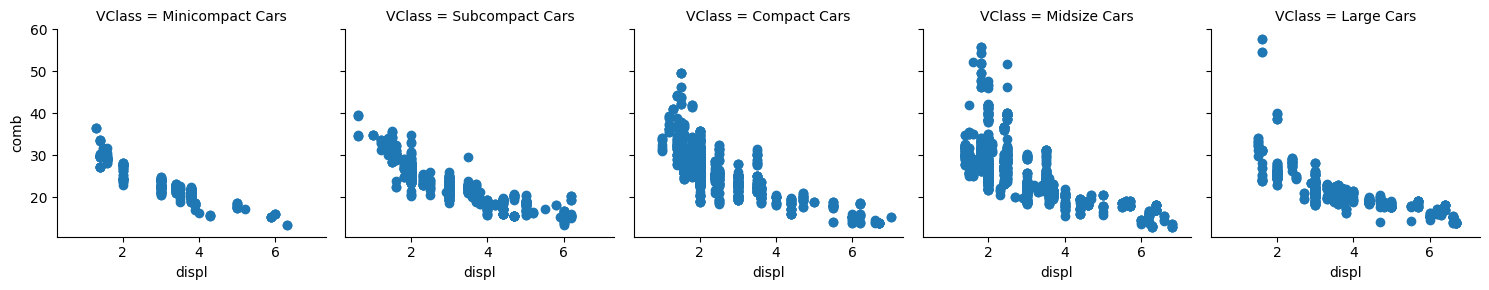

In [148]:
g = sns.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.scatter,"displ", "comb");

Faceting for Multivariate data

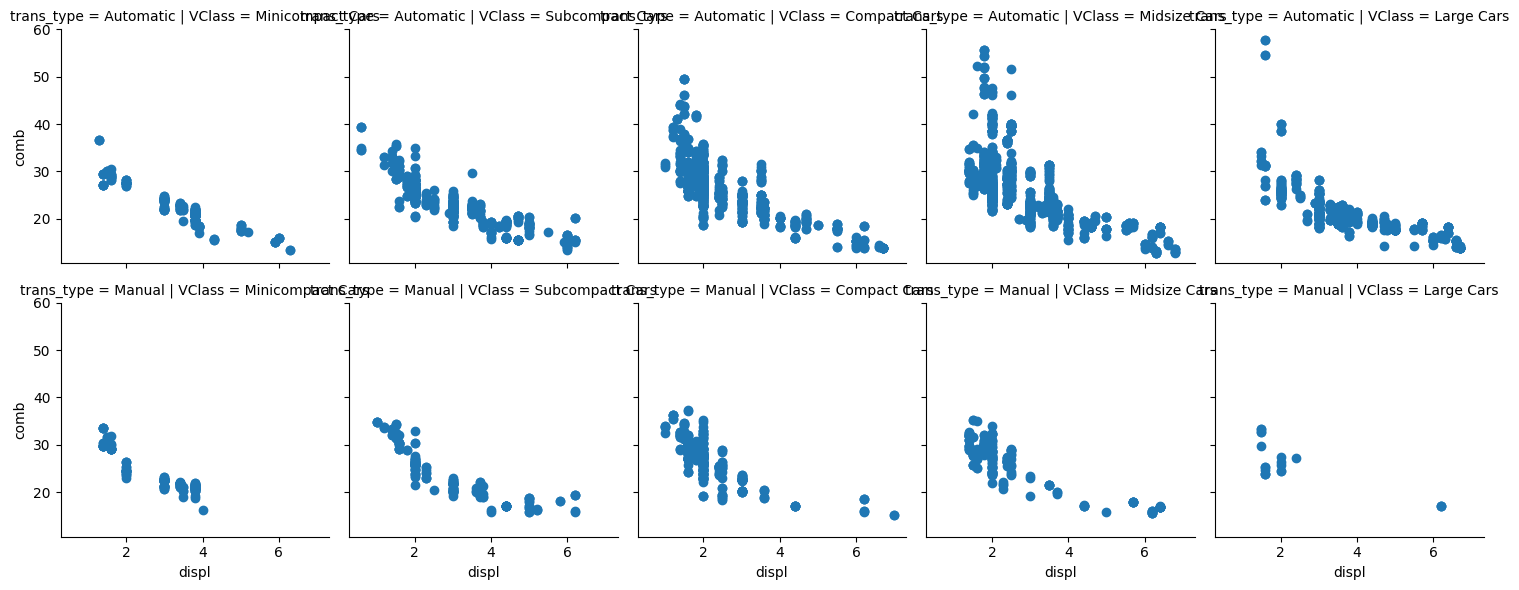

In [150]:
g = sns.FacetGrid(data=fuel_econ, col='VClass', row="trans_type")
g.map(plt.scatter,"displ", "comb");

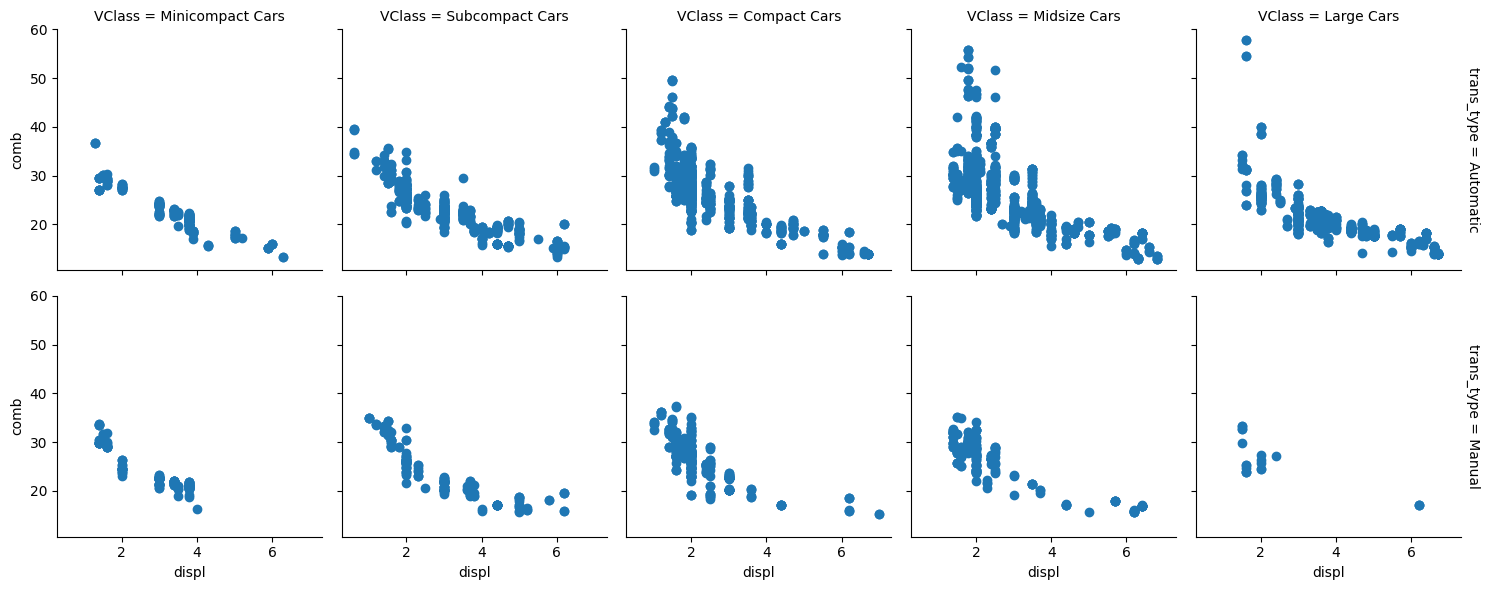

In [151]:
g = sns.FacetGrid(data=fuel_econ, col='VClass', row="trans_type",
                  margin_titles=True)
g.map(plt.scatter,"displ", "comb");

You can see that `margin_titles` need to be set to `True` for multivariate data because
* It separates out the titles to the top and right of the plots.
* It breaks up long titles into smaller and usually more reasonable sizes.'
